https://plotly.com/python/v3/ipython-notebooks/mne-tutorial/

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib ipympl

In [2]:
import pathlib

import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from plotly.offline import iplot, iplot_mpl
# import polars as pl
from mne_bids import (
    BIDSPath,
    find_matching_paths,
    get_entity_vals,
    make_report,
    print_dir_tree,
    read_raw_bids,
)
import openneuro
import mne

Accessing raw data

In [3]:
data_folder = pathlib.Path("/home/halli/Documents/ELE670/eeg-proj") # CHANGE THIS
#dataset = "ds004752" # "Epilepsy patients"
#dataset = "ds004657" # "Driving with autonomous aids"
dataset  = "ds004584" # "Rest eyes open"
subject = "001"
subject = f"sub-{subject}"

bids_root = data_folder.joinpath(f"{dataset}")
os.makedirs(bids_root, exist_ok=True)

if not bids_root.exists():
#if not bids_root.joinpath(subject).exists():
    openneuro.download(
        dataset=dataset,
        target_dir=bids_root,
        include=subject,
    )

In [4]:
# %%
sessions = get_entity_vals(bids_root, "session", ignore_sessions="on")
datatype = "eeg"
extensions = [".set"]  # ignoring json, /* ".tsv" */
bids_path: list[BIDSPath] = find_matching_paths(
    bids_root,
    datatypes=datatype,
    sessions=sessions,
    extensions=extensions,
)
print(repr(bids_path))

# Check out the first session.
bids_path_control = bids_path[110]
bids_path = bids_path[0]


[BIDSPath(
root: /home/halli/Documents/ELE670/eeg-proj/ds004584
datatype: eeg
basename: sub-001_task-Rest_eeg.set), BIDSPath(
root: /home/halli/Documents/ELE670/eeg-proj/ds004584
datatype: eeg
basename: sub-002_task-Rest_eeg.set), BIDSPath(
root: /home/halli/Documents/ELE670/eeg-proj/ds004584
datatype: eeg
basename: sub-003_task-Rest_eeg.set), BIDSPath(
root: /home/halli/Documents/ELE670/eeg-proj/ds004584
datatype: eeg
basename: sub-004_task-Rest_eeg.set), BIDSPath(
root: /home/halli/Documents/ELE670/eeg-proj/ds004584
datatype: eeg
basename: sub-005_task-Rest_eeg.set), BIDSPath(
root: /home/halli/Documents/ELE670/eeg-proj/ds004584
datatype: eeg
basename: sub-006_task-Rest_eeg.set), BIDSPath(
root: /home/halli/Documents/ELE670/eeg-proj/ds004584
datatype: eeg
basename: sub-007_task-Rest_eeg.set), BIDSPath(
root: /home/halli/Documents/ELE670/eeg-proj/ds004584
datatype: eeg
basename: sub-008_task-Rest_eeg.set), BIDSPath(
root: /home/halli/Documents/ELE670/eeg-proj/ds004584
datatype: eeg
ba

In [5]:
raw = read_raw_bids(bids_path=bids_path, verbose=True)
raw_control = read_raw_bids(bids_path=bids_path_control)
channels = raw.ch_names

Reading /home/halli/Documents/ELE670/eeg-proj/ds004584/sub-001/eeg/sub-001_task-Rest_eeg.fdt
Reading events from /home/halli/Documents/ELE670/eeg-proj/ds004584/sub-001/eeg/sub-001_task-Rest_events.tsv.
Reading channel info from /home/halli/Documents/ELE670/eeg-proj/ds004584/sub-001/eeg/sub-001_task-Rest_channels.tsv.
Reading electrode coords from /home/halli/Documents/ELE670/eeg-proj/ds004584/sub-001/eeg/sub-001_task-Rest_electrodes.tsv.
Reading /home/halli/Documents/ELE670/eeg-proj/ds004584/sub-111/eeg/sub-111_task-Rest_eeg.fdt
Reading events from /home/halli/Documents/ELE670/eeg-proj/ds004584/sub-111/eeg/sub-111_task-Rest_events.tsv.
Reading channel info from /home/halli/Documents/ELE670/eeg-proj/ds004584/sub-111/eeg/sub-111_task-Rest_channels.tsv.
Reading electrode coords from /home/halli/Documents/ELE670/eeg-proj/ds004584/sub-111/eeg/sub-111_task-Rest_electrodes.tsv.


/tmp/ipykernel_75849/1354566282.py:1: RuntimeWarning:

Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).

/tmp/ipykernel_75849/1354566282.py:1: RuntimeWarning:

The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.

/tmp/ipykernel_75849/1354566282.py:1: RuntimeWarning:

No BIDS -> MNE mapping found for channel type "n/a". Type of channel "Fp1" will be set to "misc".

/tmp/ipykernel_75849/1354566282.py:1: RuntimeWarning:

No BIDS -> MNE mapping found for channel type "n/a". Type of channel "Fz" will be set to "misc".

/tmp/ipykernel_75849/1354566282.py:1: RuntimeWarning:

No BIDS -> MNE mapping found for channel type "n/a". Type of channel "F3" will be set to "misc".

/tmp/ipykernel_75849/1354566282.py:1: RuntimeWarning:

No BIDS -> MNE mapping found for channe

In [6]:
print(
    f"Subject metadata: {raw.info['subject_info']}\n"
    f"Powerline frequency: {raw.info['line_freq']}. Sampling frequency: {raw.info['sfreq']}\n"
    f"Annotations: {raw.annotations}"
)


Subject metadata: {'his_id': 'sub-001', 'GROUP': 'PD', 'ID': '1001', 'EEG': 'PD1001', 'AGE': '80', 'GENDER': 'M', 'MOCA': '19', 'UPDRS': '28', 'TYPE': '1'}
Powerline frequency: 60.0. Sampling frequency: 500.0
Annotations: <Annotations | 1 segment: boundary (1)>


/tmp/ipykernel_75849/926456240.py:12: RuntimeWarning:

The unit for channel(s) Fp1 has changed from NA to V.

/tmp/ipykernel_75849/926456240.py:12: RuntimeWarning:

The unit for channel(s) Fz has changed from NA to V.

/tmp/ipykernel_75849/926456240.py:12: RuntimeWarning:

The unit for channel(s) F3 has changed from NA to V.

/tmp/ipykernel_75849/926456240.py:12: RuntimeWarning:

The unit for channel(s) F7 has changed from NA to V.

/tmp/ipykernel_75849/926456240.py:12: RuntimeWarning:

The unit for channel(s) FT9 has changed from NA to V.

/tmp/ipykernel_75849/926456240.py:12: RuntimeWarning:

The unit for channel(s) FC5 has changed from NA to V.

/tmp/ipykernel_75849/926456240.py:12: RuntimeWarning:

The unit for channel(s) FC1 has changed from NA to V.

/tmp/ipykernel_75849/926456240.py:12: RuntimeWarning:

The unit for channel(s) C3 has changed from NA to V.

/tmp/ipykernel_75849/926456240.py:12: RuntimeWarning:

The unit for channel(s) T7 has changed from NA to V.

/tmp/ipykernel_

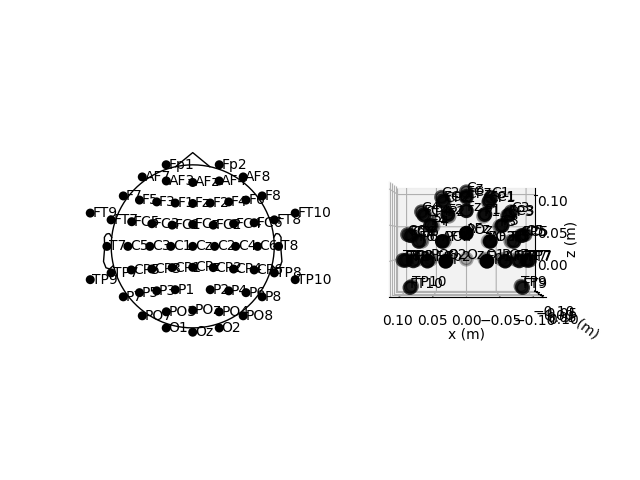

In [7]:
# Update and plot montage / channels.
ch_df = pd.read_csv(
    bids_root.joinpath(subject).joinpath(f'eeg/{subject}_task-Rest_electrodes.tsv'),
    sep='\t',
)
chs = dict()
for _, row in ch_df.iterrows():
    # TODO: Right mm
    chs[row['name']] = [-row['y'] / 10,  row['x'] / 10, row['z'] / 10]
for chan in channels:
    # Change all channels from misc to eeg
    raw.set_channel_types({chan: 'eeg'});
mont = mne.channels.make_dig_montage(chs)
raw.set_montage(mont)

fig = plt.figure()
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection="3d")
mont.plot(axes=ax2d, show=False)
mont.plot(kind="3d", axes=ax3d, show=False)
plt.show()

Effective window size : 4.096 (s)


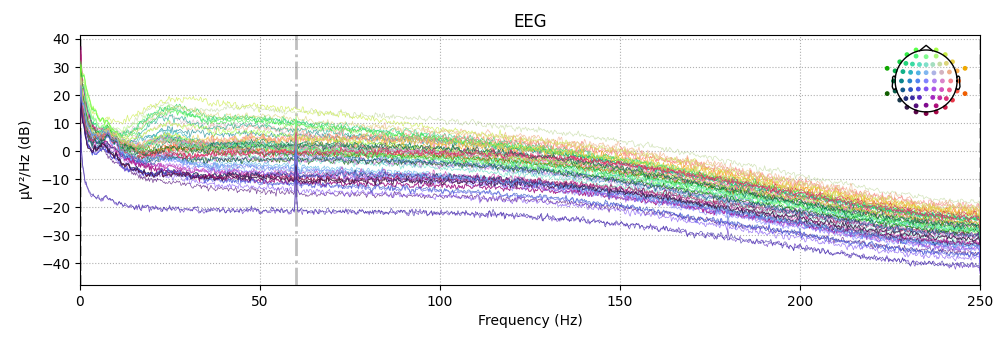

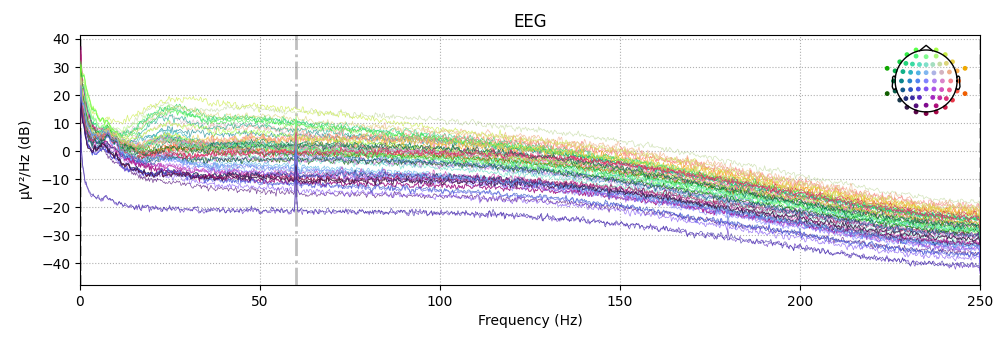

In [8]:
raw.compute_psd().plot();

Effective window size : 4.096 (s)


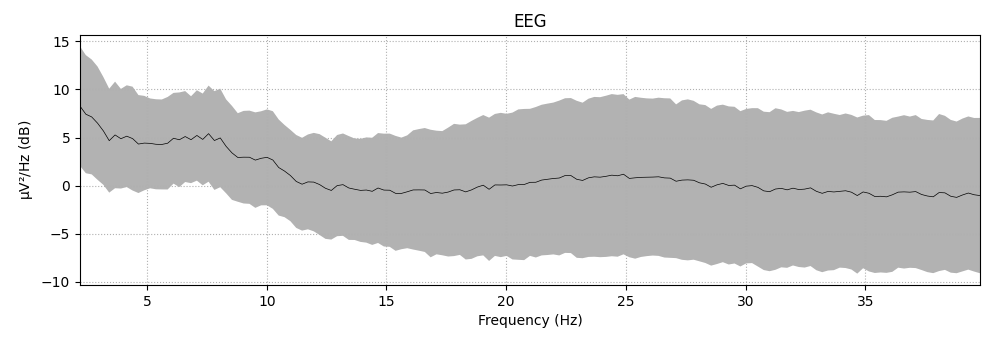

AttributeError: 'MNELineFigure' object has no attribute 'get_data'

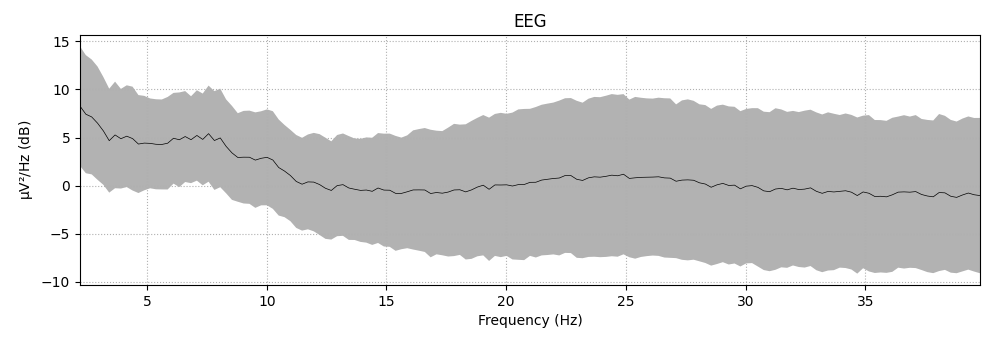

In [15]:
t = raw.compute_psd(fmin=2.0, fmax=40.0).plot(average=True, picks="data", exclude="bads");
# t = t.get_data()
# t.shape

In [9]:
# Now we can see better description of the data.
raw.describe()
raw

<RawEEGLAB | sub-001_task-Rest_eeg.fdt, 63 x 140830 (281.7 s), ~77 kB, data not loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -295.59     -54.56      -7.96      45.74     320.90
 1  Fz    EEG   µV      -194.92     -22.58       1.90      27.24     203.96
 2  F3    EEG   µV      -213.94     -18.22       2.24      25.29     136.20
 3  F7    EEG   µV      -296.49     -32.09       6.93      46.22     246.44
 4  FT9   EEG   µV      -505.05     -36.36      -4.16      37.58     270.15
 5  FC5   EEG   µV      -326.15     -24.31       2.77      29.21     160.94
 6  FC1   EEG   µV      -192.74     -16.54      -0.99      15.45      90.91
 7  C3    EEG   µV      -199.33     -14.19       5.18      24.49     118.73
 8  T7    EEG   µV      -236.69     -21.42      -2.34      15.59     104.17
 9  TP9   EEG   µV      -235.52     -15.51       2.18      21.22      94.29
10  CP5   EEG   µV      -187.16     -19.64      -1.00      18.13     104.37


<RawEEGLAB | sub-001_task-Rest_eeg.fdt, 63 x 140830 (281.7 s), ~77 kB, data not loaded>

Using matplotlib as 2D backend.


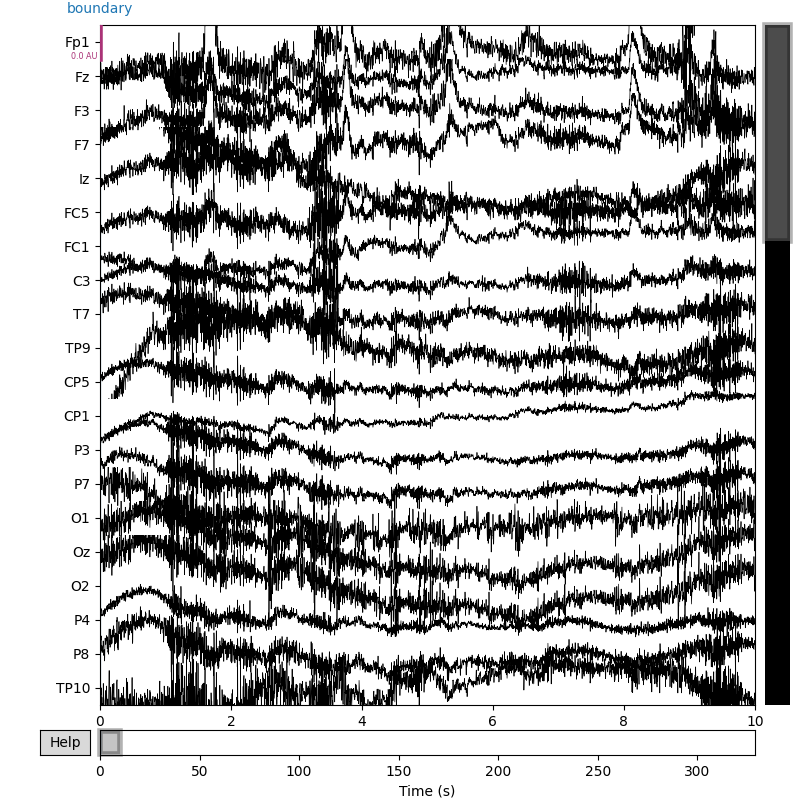

In [10]:
raw_control.plot();

In [11]:
# Plot a random sig
fig = px.line(x=raw_selection[1], y=np.squeeze(raw_selection[0].T))
iplot(fig)

NameError: name 'raw_selection' is not defined

In [ ]:
print(df[channels[0]][0:100])

0     149.582291
1     142.358582
2     141.825424
3     140.169510
4     147.545990
         ...    
95    141.408020
96    143.022690
97    148.981979
98    148.446365
99    140.685349
Name: Fp1, Length: 100, dtype: float64


In [ ]:
# Plot a random sig
fig = px.line(df, x="time", y="C3")
iplot(fig)

In [ ]:
start_sample, stop_sample = raw.time_as_index([0, 25])
samples = stop_sample - start_sample
n_channels = 10 # Plot ten first channels.
times = raw.times[start_sample:stop_sample]

step = 1. / n_channels
kwargs = dict(domain=[1 - step, 1], showticklabels=False, zeroline=False, showgrid=False)
layout = go.Layout(yaxis=go.layout.YAxis(kwargs), showlegend=False)
traces: list[go.Scatter] = []

for ii in range(1, n_channels):
        kwargs.update(domain=[1 - (ii + 1) * step, 1 - ii * step])
        layout.update({f'yaxis{ii + 1}': go.layout.YAxis(kwargs), 'showlegend': False})
        #traces.append(go.Scatter(x=times, y=data_dc.T[:, i], yaxis=f'y{ii}', name=chan))
        traces.append(go.Scatter(x=times, y=df[channels[ii]][:samples], yaxis=f'y{ii}', name=chan))


annotations = go.Annotations([go.Annotation(x=-0.06, y=0, xref='paper', yref='y%d' % (ii + 1),
                                      text=ch_name, font=dict(size=9), showarrow=False)
                          for ii, ch_name in enumerate(channels[:n_channels])])
layout.update(annotations=annotations)
layout.update(autosize=False, width=1000, height=1000)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

/home/halli/.local/share/hatch/env/virtual/eeg-proj/rwnfOyho/eeg-proj/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:143: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation


/home/halli/.local/share/hatch/env/virtual/eeg-proj/rwnfOyho/eeg-proj/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:62: DeprecationWarning:

plotly.graph_objs.Annotations is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




In [ ]:
# picks = mne.pick_channels()